In [1]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

#for fitting
from scipy.stats import norm
import statistics

%matplotlib inline

In [2]:
file_mixed = uproot.open('DlDl_mixed_300-449.root')
file_mixed.keys()

['Y4S;1']

In [3]:
file_charged = uproot.open('DlDl_charged_300-449.root')
file_charged.keys()

['Y4S;1']

In [4]:
%%time
tree = file_mixed['Y4S']
branches_mixed = tree.arrays(library="pd")

tree = file_charged['Y4S']
branches_charged = tree.arrays(library="pd")

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 27.5 s, sys: 1.15 s, total: 28.6 s
Wall time: 29.8 s


In [5]:
pd.set_option('max_columns', None)
branches_charged

__experiment__  __run__  __event__  __production__  __candidate__  \
0                1003        0    7701816           24816              0   
1                1003        0    3752641           24816              0   
2                1003        0    3752641           24816              1   
3                1003        0    3752641           24816              2   
4                1003        0    3752641           24816              3   
...               ...      ...        ...             ...            ...   
33620            1003        0   41341730           24816              0   
33621            1003        0   41341730           24816              1   
33622            1003        0   41341730           24816              2   
33623            1003        0   41341730           24816              3   
33624            1003        0   41341730           24816              4   

       __ncandidates__  __weight__  aBminusMode  aBplusMode  aB0Mode  \
0                    1         1.0      -1021.0      1021.0    -99.0   
1                    4         1.0      -1022.0      1019.0    -99.0   
2                    4         1.0      -1022.0      1019.0    -99.0   
3                    4         1.0      -1022.0      1019.0    -99.0   
4                    4         1.0      -1022.0      1019.0    -99.0   
...                ...         ...          ...         ...      ...   
33620                5         1.0      -1001.0    101001.0    -99.0   
33621                5         1.0      -1001.0    101001.0    -99.0   
33622                5         1.0      -1001.0    101001.0    -99.0   
33623                5         1.0      -1001.0    101001.0    -99.0   
33624                5         1.0      -1001.0    101001.0    -99.0   

       aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  aDplusMode  \
0           -99.0          -99.0         -99.0        -99.0       -99.0   
1           -99.0          -99.0         -99.0        -99.0       -99.0   
2           -99.0          -99.0         -99.0        -99.0       -99.0   
3           -99.0          -99.0         -99.0        -99.0       -99.0   
4           -99.0          -99.0         -99.0        -99.0       -99.0   
...           ...            ...           ...          ...         ...   
33620       -99.0          -99.0         -99.0        -99.0       -99.0   
33621       -99.0          -99.0         -99.0        -99.0       -99.0   
33622       -99.0          -99.0         -99.0        -99.0       -99.0   
33623       -99.0          -99.0         -99.0        -99.0       -99.0   
33624       -99.0          -99.0         -99.0        -99.0       -99.0   

       aD0Mode  aDbar0Mode       ECM       pCM      InvM   cosThCM     phiCM  \
0       1036.0     -1002.0  7.960355  1.654211  7.794179 -0.263851 -2.237856   
1       1051.0     -1046.0  7.772460  1.384742  7.638792  0.377075 -0.283849   
2       1051.0     -1046.0  7.435491  1.282606  7.322535  0.190267 -0.384474   
3       1051.0     -1046.0  7.712613  1.422123  7.594039  0.292807 -0.273822   
4       1051.0     -1046.0  7.720263  1.408844  7.622370  0.310221 -0.266020   
...        ...         ...       ...       ...       ...       ...       ...   
33620   1054.0     -1036.0  8.318944  1.409795  8.197624 -0.003549 -1.264047   
33621   1054.0     -1036.0  8.160122  1.462060  8.027433 -0.026611 -1.295221   
33622   1054.0     -1036.0  8.385745  1.429453  8.262023 -0.037489 -1.293584   
33623   1054.0     -1036.0  8.251559  1.512157  8.111173 -0.073990 -1.315065   
33624   1054.0     -1036.0  8.226922  1.484053  8.091336 -0.058955 -1.323308   

          PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  Q_ROE     M_ROE  \
0      300553      0.0       2.0      1.0       2.0    0.0  0.195518   
1      300553      0.0       5.0      0.0       5.0    0.0  0.960072   
2      300553      0.0       6.0      0.0       6.0    0.0  1.195286   
3      300553      0.0       5.0      0.0       5.0    0.0  0.974079   
4      

In [6]:
branches_charged['D_B0_genMotherPDG_0'].value_counts()

 0.0         11759
 423.0       10273
-521.0        5821
 300553.0     1470
-423.0        1162
 521.0         789
 413.0         622
 10423.0       530
 10421.0       370
 425.0         303
 20423.0       181
-413.0         165
-10423.0        70
-425.0          47
-10421.0        45
-20423.0        13
 30443.0         3
-10433.0         1
 433.0           1
Name: D_B0_genMotherPDG_0, dtype: int64

In [8]:
my_data = branches_charged.query('(D_B0_genMotherPDG_0==[521.0, -521.0])&(e_B0_genMotherPDG_0==[521.0, -521.0])')
my_data['pi4_B0_mcPDG'].value_counts()

 300553.0     204
 111.0        170
 211.0        168
-211.0        151
-423.0         71
-521.0         59
 521.0         45
 221.0         34
-421.0         22
-13.0          12
-11.0           9
 421.0          9
 11.0           9
-321.0          7
 10423.0        6
 423.0          4
 321.0          4
-425.0          4
-10421.0        4
 113.0          4
-10423.0        3
 433.0          2
-411.0          2
-20213.0        2
 20213.0        1
 20433.0        1
 413.0          1
 313.0          1
 20423.0        1
-20423.0        1
 10323.0        1
 9000221.0      1
Name: pi4_B0_mcPDG, dtype: int64

In [9]:
def signal(row):  
    if (row['D_B0_genMotherPDG_0']==521.0 or row['D_B0_genMotherPDG_0']==-521.0) and (row['e_B0_genMotherPDG_0']==521.0 or row['e_B0_genMotherPDG_0']==-521.0):
        return 1
    else:
        return 0

In [13]:
branches_charged['mysignal'] = branches_charged.apply(lambda row: signal(row), axis=1)
branches_charged.query('mysignal==1')['pi4_B0_mcPDG'].value_counts()

 300553.0     204
 111.0        170
 211.0        168
-211.0        151
-423.0         71
-521.0         59
 521.0         45
 221.0         34
-421.0         22
-13.0          12
-11.0           9
 421.0          9
 11.0           9
-321.0          7
 10423.0        6
 423.0          4
 321.0          4
-425.0          4
-10421.0        4
 113.0          4
-10423.0        3
 433.0          2
-411.0          2
-20213.0        2
 20213.0        1
 20433.0        1
 413.0          1
 313.0          1
 20423.0        1
-20423.0        1
 10323.0        1
 9000221.0      1
Name: pi4_B0_mcPDG, dtype: int64

# finding the best fit

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
cosTBTO = branches_charged['cosTBTO'].values

f = Fitter(cosTBTO,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

# Normal fitting to histogram

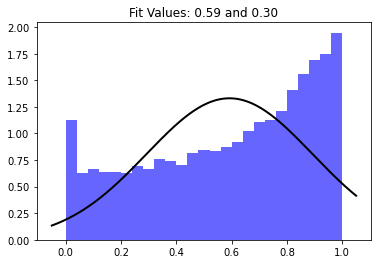

In [14]:
data = branches_charged['cosTBTO']
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)

title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

# Checking the rest of event variables (mass and the number of them)

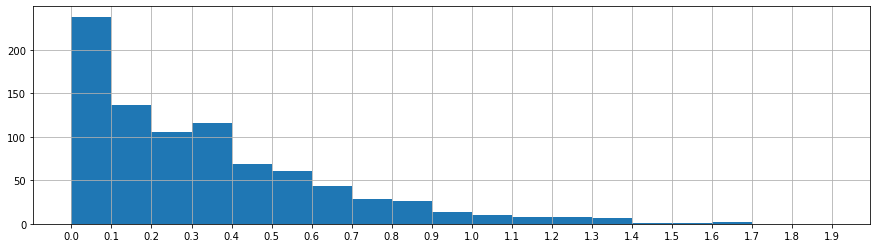

In [15]:
plt.figure(figsize=(15, 4))

bins=np.arange(0, 2, .1)
branches_charged.query('isSignal==1')['Eextra_ROE'].hist(bins=bins)

plt.xticks(bins)
plt.show()

In [16]:
branches_charged['R2']

0        0.200944
1        0.122395
2        0.116288
3        0.118625
4        0.124481
           ...   
33620    0.171352
33621    0.172366
33622    0.174452
33623    0.175645
33624    0.175467
Name: R2, Length: 33625, dtype: float64

<AxesSubplot:>

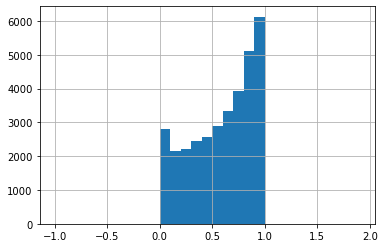

In [17]:
branches_charged['cosTBTO'].hist(bins=np.arange(-1, 2, .1))

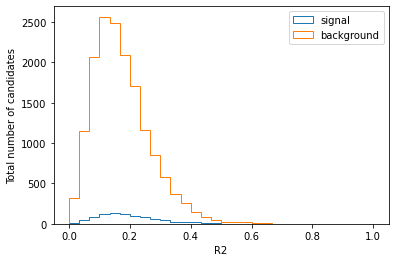

In [18]:
fig, ax = plt.subplots()

signal_df = branches_charged.query("(isSignal == 1.0)")
continuum_df = branches_charged.query("(isSignal == 0.0)")

hist_kwargs = dict(bins=30, range=(0, 1), histtype="step")
ax.hist(signal_df["R2"], label="signal", **hist_kwargs)
ax.hist(continuum_df["R2"], label="background", **hist_kwargs)
ax.set_xlabel("R2")
ax.set_ylabel("Total number of candidates")
ax.legend()

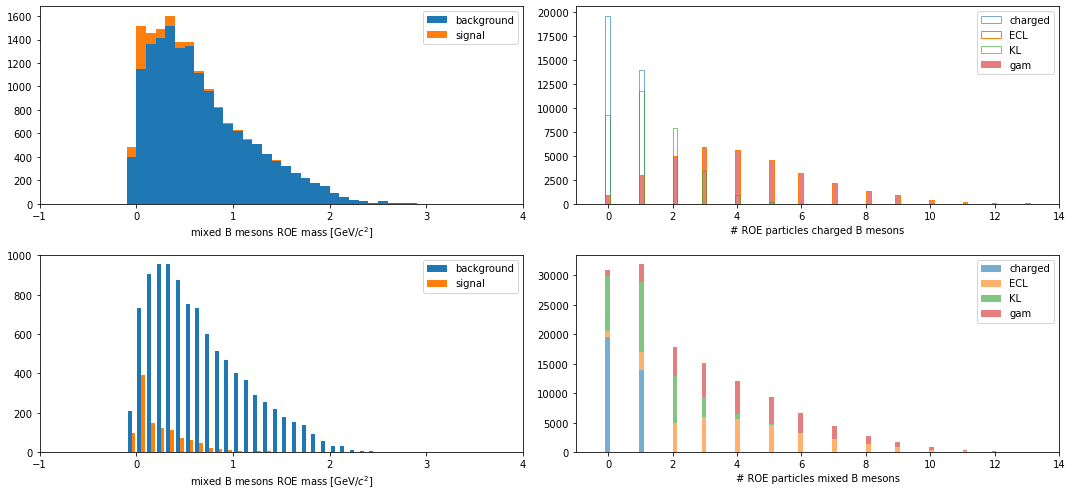

In [19]:
fig, ax = plt.subplots(2,2, figsize=(15, 7))

mass_roe_charged = [
    branches_charged.groupby('isSignal')['M_ROE'].get_group(signal)
    for signal in [0,1]
]

mass_roe_mixed = [
    branches_mixed.groupby('isSignal')['M_ROE'].get_group(signal)
    for signal in [0,1]
]


m_bins = 50
m_range = (-1, 4)
ax[0,0].hist(mass_roe_charged, bins = m_bins, range=m_range, label=['background', 'signal'], histtype='barstacked')

ax[0,0].set_xlim(m_range)
ax[0,0].set_xlabel('mixed B mesons ROE mass [GeV/$c^2$]')
ax[0,0].legend()


m_bins = 100
m_range = (-1, 14)
ax[0,1].hist(branches_charged['nROE_Ch'], bins = m_bins, range=m_range, alpha=0.6, label='charged', histtype='step')
ax[0,1].hist(branches_charged['nROE_ECL'], bins = m_bins, range=m_range, alpha=1, label='ECL', histtype='step')
ax[0,1].hist(branches_charged['nROE_KL'], bins = m_bins, range=m_range, alpha=0.6, label='KL', histtype='step')
ax[0,1].hist(branches_charged['nROE_gam'], bins = m_bins, range=m_range, alpha=0.6, label='gam')

ax[0,1].set_xlim(m_range)
ax[0,1].set_xlabel('# ROE particles charged B mesons')
ax[0,1].legend()


m_bins = 50
m_range = (-1, 4)
ax[1,0].hist(mass_roe_mixed, bins = m_bins, range=m_range, label=['background', 'signal'])

ax[1,0].set_xlim(m_range)
ax[1,0].set_xlabel('mixed B mesons ROE mass [GeV/$c^2$]')
ax[1,0].legend()


m_bins = 100
m_range = (-1, 14)

roe=branches_charged[['nROE_Ch', 'nROE_ECL', 'nROE_KL', 'nROE_gam']]
label=['charged', 'ECL', 'KL', 'gam']
ax[1,1].hist(roe, bins = m_bins, range=m_range, alpha=0.6, label=label, stacked=True)

ax[1,1].set_xlim(m_range)
ax[1,1].set_xlabel('# ROE particles mixed B mesons')
ax[1,1].legend()

fig.tight_layout()

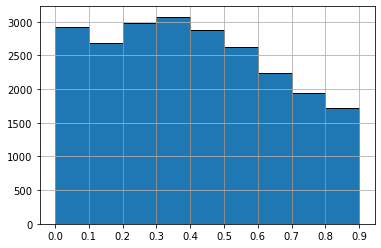

In [20]:
bins=np.arange(0, 1, .1)
branches_charged['M_ROE'].hist(bins=bins, edgecolor='black')
plt.xticks(bins)
plt.show()

<AxesSubplot:>

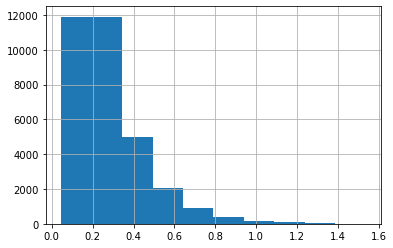

In [21]:
branches_charged['ECM_roegam'].hist()

Text(0.5, 1.0, 'mixed B mesons')

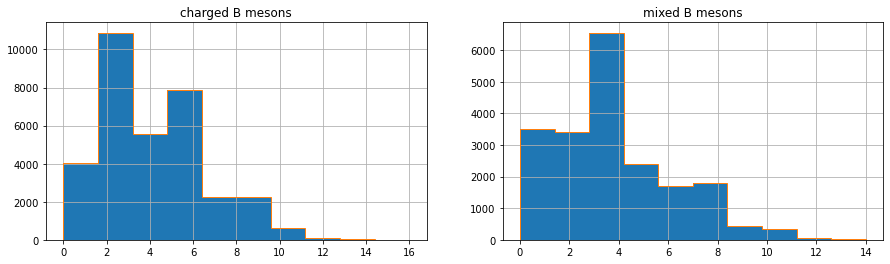

In [22]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2, 1)
branches_charged['nROE_ECL'].hist()
branches_charged['nROE_gam'].hist(histtype='step')
plt.title('charged B mesons')

plt.subplot(1,2, 2)
branches_mixed['nROE_ECL'].hist()
branches_mixed['nROE_gam'].hist(histtype='step')
plt.title('mixed B mesons')

$ $
$ $

In [23]:
branches_charged['nMCGen'].value_counts()

53     1348
49     1255
52     1220
45     1219
51     1218
       ... 
96        3
106       2
103       2
23        2
100       1
Name: nMCGen, Length: 82, dtype: int64

In [24]:
branches_charged.query('isSignal==1')['pi4_B0_mcPDG'].value_counts()

-211.0    83
 111.0    32
 221.0     6
Name: pi4_B0_mcPDG, dtype: int64

# checking the corrolation plot between energy and momentum of B meson

# sum of the B0_ECM and B1_ECM to see whether it matches Y4S ECM

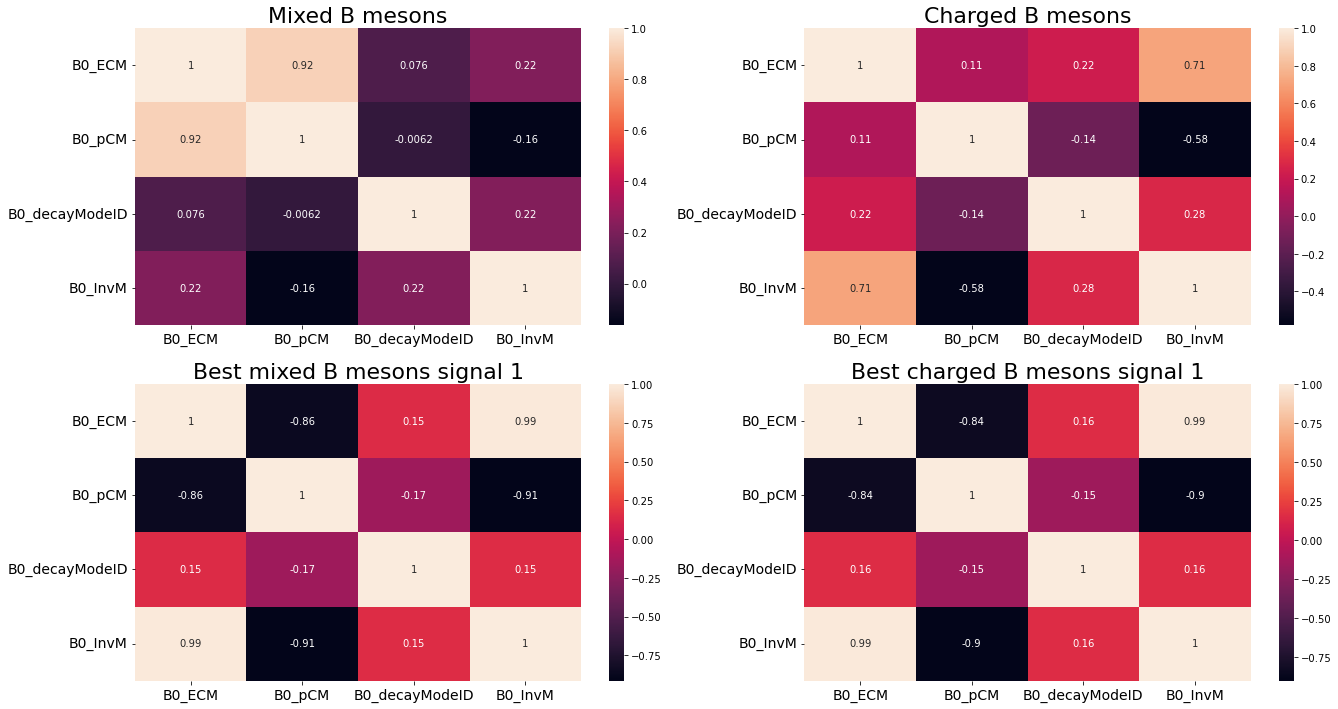

In [25]:
f = plt.figure(figsize=(22, 12))


variable = ['B0_ECM', 'B0_pCM', 'B0_decayModeID', 'B0_InvM']

df_mixed=branches_mixed[variable]
df_charged=branches_charged[variable]

plt.subplot(2, 2, 1)
hm = sns.heatmap(df_mixed.corr(), annot = True)

plt.title('Mixed B mesons', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)


plt.subplot(2, 2, 2)
hm = sns.heatmap(df_charged.corr(), annot = True)

plt.title('Charged B mesons', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)




df_mixed=branches_mixed.query('(__candidate__==0) & (B0_isSignal==1)')[variable]
df_charged=branches_charged.query('(__candidate__==0) & (B0_isSignal==1)')[variable]

plt.subplot(2, 2, 3)
hm = sns.heatmap(df_mixed.corr(), annot = True)

plt.title('Best mixed B mesons signal 1', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)


plt.subplot(2, 2, 4)
hm = sns.heatmap(df_charged.corr(), annot = True)

plt.title('Best charged B mesons signal 1', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)



plt.show()

<AxesSubplot:>

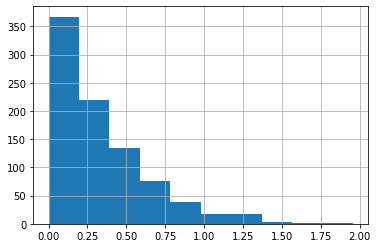

In [26]:
branches_charged.query('isSignal==1')['Eextra_ROE'].hist()

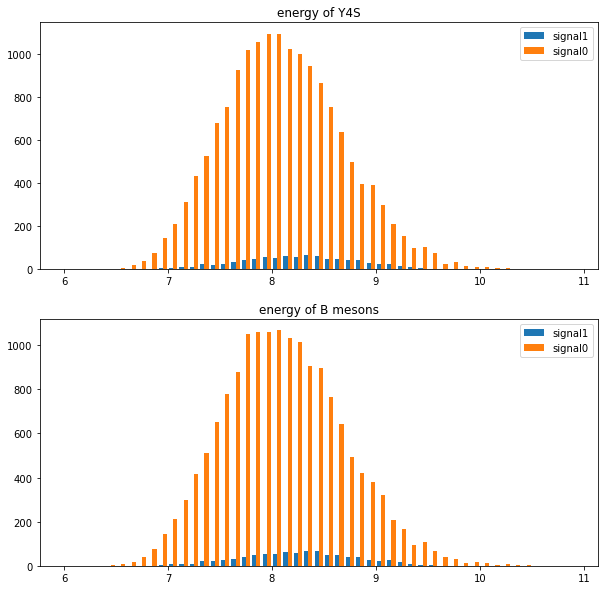

In [27]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
ECM = [
    branches_charged.query(f'isSignal=={signal}')['ECM']
    for signal in [1, 0]
]

y = plt.hist(ECM, bins=np.arange(6, 11, .1), label=['signal1', 'signal0'])
plt.title('energy of Y4S')
plt.legend()



plt.subplot(2, 1, 2)
B_ECM=[
    branches_charged.query(f'isSignal=={signal}').loc[:, ['B0_ECM', 'B1_ECM']].sum(axis = 1)
    for signal in [1, 0]
]

b = plt.hist(B_ECM, bins=np.arange(6, 11, .1), label=['signal1', 'signal0'])
plt.title('energy of B mesons')
plt.legend()

# checking if BminusMode's tool match the macTruth variable like mcPDG

In [28]:
print(np.unique(branches_charged['aBminusMode'], return_counts=True))

(array([-4.01002e+05, -4.01001e+05, -3.01024e+05, -3.01019e+05,
       -3.01006e+05, -3.01005e+05, -3.01004e+05, -3.01003e+05,
       -3.01002e+05, -3.01001e+05, -2.01793e+05, -2.01746e+05,
       -2.01739e+05, -2.01736e+05, -2.01735e+05, -2.01038e+05,
       -2.01028e+05, -2.01026e+05, -2.01025e+05, -2.01024e+05,
       -2.01023e+05, -2.01022e+05, -2.01021e+05, -2.01020e+05,
       -2.01016e+05, -2.01015e+05, -2.01014e+05, -2.01009e+05,
       -2.01008e+05, -2.01007e+05, -2.01006e+05, -2.01005e+05,
       -2.01004e+05, -2.01003e+05, -2.01002e+05, -2.01001e+05,
       -1.01824e+05, -1.01822e+05, -1.01795e+05, -1.01794e+05,
       -1.01793e+05, -1.01772e+05, -1.01748e+05, -1.01746e+05,
       -1.01744e+05, -1.01742e+05, -1.01739e+05, -1.01737e+05,
       -1.01736e+05, -1.01735e+05, -1.01732e+05, -1.01731e+05,
       -1.01730e+05, -1.01698e+05, -1.01691e+05, -1.01689e+05,
       -1.01684e+05, -1.01681e+05, -1.01671e+05, -1.01657e+05,
       -1.01656e+05, -1.01625e+05, -1.01618e+05, -1.01

In [29]:
branches_charged['aBminusMode'].value_counts()

-1021.0      6708
-1001.0      4645
-101001.0    2215
-1022.0      1939
-1002.0      1472
             ... 
-1614.0         1
-9.0            1
-1626.0         1
-101684.0       1
-101031.0       1
Name: aBminusMode, Length: 260, dtype: int64

In [30]:
branches_charged['aBplusMode'].value_counts().idxmax()

1021.0

In [31]:
#mostly the first particle from Y4S is B- and the second one is B+
branches_charged.query('B0_isSignal==1')['B0_mcPDG'].value_counts()

-521.0    3902
 521.0     318
Name: B0_mcPDG, dtype: int64

In [32]:
branches_charged.query('isSignal==1')['e_B0_mcPDG'].value_counts()

13.0    455
11.0    421
Name: e_B0_mcPDG, dtype: int64

In [33]:
branches_charged.query('isSignal==1')['D_B0_mcPDG'].value_counts()

421.0    483
423.0    310
413.0     48
411.0     35
Name: D_B0_mcPDG, dtype: int64

In [34]:
branches_charged['aBminusMode'].value_counts().idxmax()

-1021.0

<AxesSubplot:>

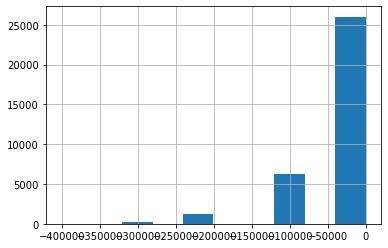

In [35]:
branches_charged['aBminusMode'].hist(bins=10)

# checking the variable candidate for Y4S and B0 and D_B0

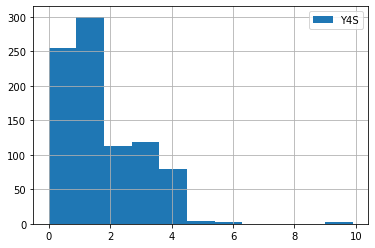

In [36]:
branches_charged.query('isSignal==1')['__candidate__'].hist(bins=np.arange(0, 10, .9),histtype="barstacked", label='Y4S')
#branches_charged.query('B0_isSignal==1')['__candidate__'].hist(bins=np.arange(0, 10, .9),histtype="barstacked", alpha=.6, label='B0')
#branches_charged.query('D_B0_isSignal==1')['__candidate__'].hist(bins=np.arange(0, 10, .9),histtype="barstacked", alpha=.2, label='D_B0')

plt.legend()

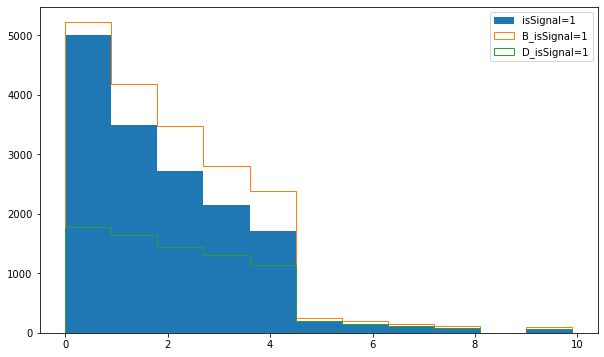

In [37]:
plt.figure(figsize=(10, 6))

best_candidate=[
    branches_charged.query(f"isSignal == {isSignal}")['__candidate__']
    for isSignal in [0]
]
bin_values, edges, _ = plt.hist(best_candidate, bins=np.arange(0, 10, .9), 
                                histtype="barstacked", label=["isSignal=1", "isSignal=0"],)


B_best = [
    branches_charged.query(f"B0_isSignal=={isSignal}")['__candidate__']
    for isSignal in [0]
]

bin_values, edges, _ = plt.hist(B_best, bins=np.arange(0, 10, .9), 
                                histtype="step", label=["B_isSignal=1", "B_isSignal=0"])

D_best = [
    branches_charged.query(f'D_B0_isSignal=={isSignal}')['__candidate__']
    for isSignal in [0]
]


bin_values, edges, _ = plt.hist(D_best, bins=np.arange(0, 10, .9), 
                                histtype="step", label=["D_isSignal=1", "D_isSignal=0"])

                           
plt.legend()